In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 652.8 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 6.4 MB/s eta 0:00:00a 0:00:01


In [2]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

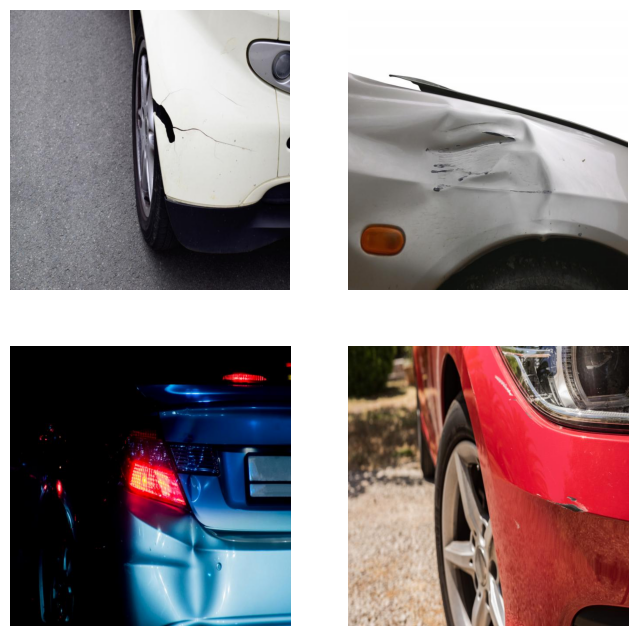

In [3]:

train_images = "/kaggle/input/car-dam/train/images"
train_labels = "/kaggle/input/car-dam/train/labels"

test_images = "/kaggle/input/car-dam/test/images"
test_labels = "/kaggle/input/car-dam/test/labels"

val_images = "/kaggle/input/car-dam/valid/images"
val_labels = "/kaggle/input/car-dam/valid/labels"

image_files = os.listdir(train_images)

# Выбор 4 случайных изображений
random_images = random.sample(image_files, 4)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))


for i, image_file in enumerate(random_images):
    row = i // 2
    col = i % 2
    
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [4]:
image = cv2.imread("/kaggle/input/car-dam/test/images/000003_jpg.rf.86f7bf495e0d380148e40aec72f1fa8a.jpg")

# Получаем размер изображения
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 640x640 and 3 channels.


In [10]:
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_r

In [8]:
 # Загрузка предобученной модели
model = YOLO('yolov10l.pt')

100%|██████████| 50.0M/50.0M [00:00<00:00, 106MB/s] 


In [14]:
for param in list(model.parameters())[-5:]:
    param.requires_grad = True  

In [15]:
# Обучение модели
model.train(data = '/kaggle/input/car-dam/data.yaml',
            epochs = 100,
            imgsz = 640,
            seed = 42,
            batch = 16,
            workers = 4,
            augment=True)

engine/trainer: task=detect, mode=train, model=yolov10l.pt, data=/kaggle/input/car-dam/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, 

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]
2024-08-19 07:49:11,539	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-19 07:49:12,371	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1    268800  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 75.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/car-dam/train/labels... 2800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2800/2800 [00:08<00:00, 342.11it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/car-dam/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/car-dam/valid/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:02<00:00, 327.19it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-dam/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        15G      2.862      6.784      3.511         75        640: 100%|██████████| 175/175 [02:45<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755     0.0308     0.0304    0.00544    0.00224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      14.9G      3.449      5.929      3.912         56        640: 100%|██████████| 175/175 [02:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.108      0.271      0.109     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.9G       3.38      5.926      3.852         67        640: 100%|██████████| 175/175 [02:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.539      0.171      0.177     0.0908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.9G      3.293      5.568      3.738         93        640: 100%|██████████| 175/175 [02:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.401       0.22      0.179      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      14.8G      3.129      5.308       3.63         71        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.417      0.343      0.291      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.9G      3.027      5.028      3.534         55        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.627      0.332      0.349      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      14.9G      2.934      4.791      3.456         71        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.571      0.396      0.367      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.9G      2.902      4.699       3.43         59        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:19<00:00,  1.32it/s]

                   all        800       1755      0.597      0.392      0.405      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.8G      2.808       4.53      3.371         96        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]

                   all        800       1755       0.62      0.454      0.459      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      14.9G      2.775      4.351       3.33         67        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.656      0.432      0.451      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      14.9G      2.742      4.259      3.293         82        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.527      0.474      0.476       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      14.9G      2.671      4.105      3.238         53        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.484      0.478      0.469      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.8G      2.676          4      3.235         76        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.581       0.45      0.472      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      14.9G      2.665      4.026      3.222         85        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.645      0.482      0.506      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      14.9G        2.6      3.973      3.189         52        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.566      0.497      0.518      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      14.9G      2.595      3.909      3.177         56        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.416      0.483      0.439      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.8G      2.543      3.828      3.135         53        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.527      0.494       0.51      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.8G      2.569      3.833      3.152         77        640: 100%|██████████| 175/175 [02:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.527      0.512      0.522      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      14.9G      2.512      3.719      3.103         56        640: 100%|██████████| 175/175 [02:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755       0.53       0.56       0.55      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.9G      2.495       3.65      3.105         62        640: 100%|██████████| 175/175 [02:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.502      0.465      0.489       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.8G      2.442      3.573      3.067         75        640: 100%|██████████| 175/175 [02:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]

                   all        800       1755      0.548      0.564      0.561      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      14.9G      2.464       3.55      3.066         84        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]

                   all        800       1755      0.542      0.572       0.55      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.9G      2.438      3.487      3.044         72        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755       0.57      0.534       0.55      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.9G      2.447      3.474      3.047         53        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.583      0.517      0.567      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.8G      2.383       3.42      3.018         67        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.599      0.606      0.604      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.9G      2.397      3.392      3.017         74        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755       0.61      0.561      0.598      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.9G      2.355      3.292      2.986         64        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.646      0.565      0.603      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.9G      2.344      3.217      2.961         72        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.667      0.579      0.613      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.8G      2.348      3.243      2.971         72        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.658      0.583      0.627      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      14.9G      2.316      3.186      2.934         96        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755       0.62      0.576      0.601      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.9G      2.305      3.186      2.937         53        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.606      0.581      0.622      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.9G      2.313      3.091      2.923         58        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.631      0.569      0.608      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.8G      2.262       3.08      2.914         53        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.635      0.572      0.601      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.9G      2.264      3.039       2.91         54        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.592      0.614      0.615      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.9G      2.213      2.964       2.87         72        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755       0.68      0.589      0.632      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      14.9G      2.277       3.05      2.915         55        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.645      0.585      0.631      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.8G      2.226       2.97      2.867         68        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.661      0.635      0.652      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      14.9G      2.194      2.933      2.833         74        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.654      0.614       0.64      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.8G      2.165      2.856      2.821         65        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.682      0.615      0.659      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.8G      2.174       2.88      2.835         43        640: 100%|██████████| 175/175 [02:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.661      0.642      0.669      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.8G      2.175      2.777      2.822         64        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.703      0.581      0.652      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      14.8G       2.16      2.777      2.801         69        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.647      0.617      0.653      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.9G      2.137      2.767      2.788         67        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.655      0.597      0.637      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.8G      2.128      2.724      2.792         66        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755       0.64      0.631      0.658      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.8G      2.076      2.645      2.756         55        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755       0.63      0.625      0.665       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.9G      2.103      2.621      2.783         84        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.629      0.645      0.669      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.9G      2.062      2.616      2.764         62        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.699      0.629      0.683      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.8G      2.084      2.639      2.758         89        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.661      0.634      0.666      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.8G      2.058      2.554       2.73        102        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.682      0.641      0.672       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      14.9G      2.064      2.509      2.745         55        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.695       0.62      0.671      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.9G      2.036      2.516      2.712         45        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.661      0.639      0.674      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.9G      1.994      2.428      2.677         83        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.666      0.665      0.674      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      14.8G      2.026      2.456      2.695         72        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755       0.69      0.653      0.686      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.9G       1.98      2.391       2.67         70        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.658      0.642       0.67      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.8G      1.951      2.329      2.663         70        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.711      0.649      0.695      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.9G      1.936      2.333       2.64         62        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.661      0.657      0.675      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      14.8G      1.969      2.355      2.662         61        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.705      0.647      0.679      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      14.9G      1.947      2.311      2.648         62        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.686      0.644      0.685      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.9G      1.927      2.279       2.65         71        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.739      0.629      0.699      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      14.8G      1.917       2.23      2.624         69        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.688      0.644       0.69       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      14.8G      1.897      2.211      2.612         60        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.703       0.63      0.679      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      14.8G      1.902      2.184      2.603         61        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.694      0.657        0.7      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      14.9G       1.88      2.178      2.606         71        640: 100%|██████████| 175/175 [02:36<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.715       0.65      0.698      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      14.9G      1.853       2.08      2.571         76        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.651      0.682      0.697      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      14.8G      1.862      2.124      2.582         68        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.694      0.653       0.69      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      14.9G      1.847        2.1      2.574         82        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.702      0.656      0.702      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      14.9G      1.852      2.079      2.574         86        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.697      0.658        0.7      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      14.9G      1.816      2.032       2.56         51        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.729      0.659      0.708      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.8G       1.79      1.966      2.525         79        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.676      0.682      0.698      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.8G      1.813      1.984      2.541         60        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.695      0.679      0.702      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.8G      1.774      1.938      2.509         52        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.748      0.651      0.705      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      14.9G       1.78      1.923      2.514         83        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.722      0.678       0.71      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      14.8G      1.741      1.896      2.486         65        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.713      0.682      0.707       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      14.8G      1.715       1.84      2.477         53        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755       0.76      0.641      0.705      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      14.8G      1.717      1.858      2.474         92        640: 100%|██████████| 175/175 [02:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.754      0.648      0.716      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      14.9G       1.71      1.848      2.469         82        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.757      0.642      0.701      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      14.8G      1.703      1.765       2.45         66        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.739      0.666      0.713      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      14.8G      1.693      1.772      2.458         81        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.718      0.666      0.714      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      14.8G      1.657      1.724      2.426         63        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.747      0.674      0.714      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      14.8G       1.66      1.721      2.434         43        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.703      0.699      0.708      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.8G      1.649      1.689      2.412         71        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.737      0.679      0.716      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      14.9G      1.626      1.696      2.408         62        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.744      0.674      0.713      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      14.9G      1.634      1.655        2.4         72        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.737      0.674      0.717      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      14.9G      1.636      1.636      2.392         65        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.723      0.672      0.723       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.8G      1.602      1.612      2.385         69        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.731      0.665      0.714       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      14.8G      1.595      1.589      2.382         68        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.729      0.663      0.708      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      14.9G       1.61      1.612      2.382         73        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755       0.73      0.663      0.708      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      14.9G      1.581      1.572      2.385         64        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.736      0.682      0.716       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      14.8G      1.576      1.542      2.371         70        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.724      0.697      0.722      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      14.8G      1.554      1.512      2.359         79        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.725      0.698      0.722      0.582


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      14.8G      1.409      1.281      2.282         37        640: 100%|██████████| 175/175 [02:36<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.722      0.692      0.714      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      14.8G      1.377      1.163      2.262         36        640: 100%|██████████| 175/175 [02:35<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.738      0.661      0.719      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      14.8G      1.349      1.119      2.235         36        640: 100%|██████████| 175/175 [02:35<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.749      0.667      0.716      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      14.8G      1.349      1.123      2.242         26        640: 100%|██████████| 175/175 [02:35<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.751      0.682      0.718       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      14.8G       1.33      1.069      2.219         32        640: 100%|██████████| 175/175 [02:35<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.753      0.673      0.717      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      14.8G      1.311      1.054      2.205         37        640: 100%|██████████| 175/175 [02:35<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.785      0.668      0.724      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      14.8G      1.281       1.03       2.19         22        640: 100%|██████████| 175/175 [02:35<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.763      0.678      0.718      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      14.8G      1.252     0.9763      2.166         26        640: 100%|██████████| 175/175 [02:35<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.33it/s]

                   all        800       1755      0.737      0.691       0.72      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      14.8G      1.254     0.9717      2.154         32        640: 100%|██████████| 175/175 [02:35<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.757      0.683       0.72      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      14.8G      1.248     0.9822      2.171         28        640: 100%|██████████| 175/175 [02:35<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]

                   all        800       1755      0.738      0.702      0.725      0.587



100 epochs completed in 4.959 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 461 layers, 25,725,620 parameters, 0 gradients, 126.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/25 [00:00<?, ?it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|▍         | 1/25 [00:00<00:18,  1.31it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 2/25 [00:01<00:18,  1.22it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▏        | 3/25 [00:03<00:27,  1.25s/it]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  16%|█▌        | 4/25 [00:04<00:22,  1.09s/it]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 5/25 [00:05<00:25,  1.26s/it]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  24%|██▍       | 6/25 [00:06<00:20,  1.07s/it]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 7/25 [00:07<00:17,  1.04it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  32%|███▏      | 8/25 [00:07<00:14,  1.14it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 9/25 [00:08<00:13,  1.21it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 10/25 [00:09<00:11,  1.26it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 11/25 [00:10<00:10,  1.30it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 12/25 [00:10<00:09,  1.32it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  52%|█████▏    | 13/25 [00:11<00:08,  1.34it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▌    | 14/25 [00:12<00:08,  1.36it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 15/25 [00:12<00:07,  1.36it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 16/25 [00:13<00:06,  1.37it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  68%|██████▊   | 17/25 [00:14<00:05,  1.37it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  72%|███████▏  | 18/25 [00:15<00:05,  1.38it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  76%|███████▌  | 19/25 [00:15<00:04,  1.37it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 20/25 [00:16<00:03,  1.38it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  84%|████████▍ | 21/25 [00:17<00:02,  1.38it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 22/25 [00:18<00:02,  1.38it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  92%|█████████▏| 23/25 [00:18<00:01,  1.38it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  96%|█████████▌| 24/25 [00:19<00:00,  1.38it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:20<00:00,  1.24it/s]


                   all        800       1755      0.757      0.683       0.72      0.589
                 crack        116        188        0.5      0.309      0.333      0.193
                  dent        341        483      0.643      0.522       0.57      0.354
         glass shatter        129        129      0.925      0.962      0.963      0.916
           lamp broken        132        136      0.835      0.868      0.911      0.803
               scratch        417        742      0.653      0.526      0.587      0.348
             tire flat         74         77      0.986      0.911      0.959      0.919
Speed: 0.2ms preprocess, 18.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e260482860>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

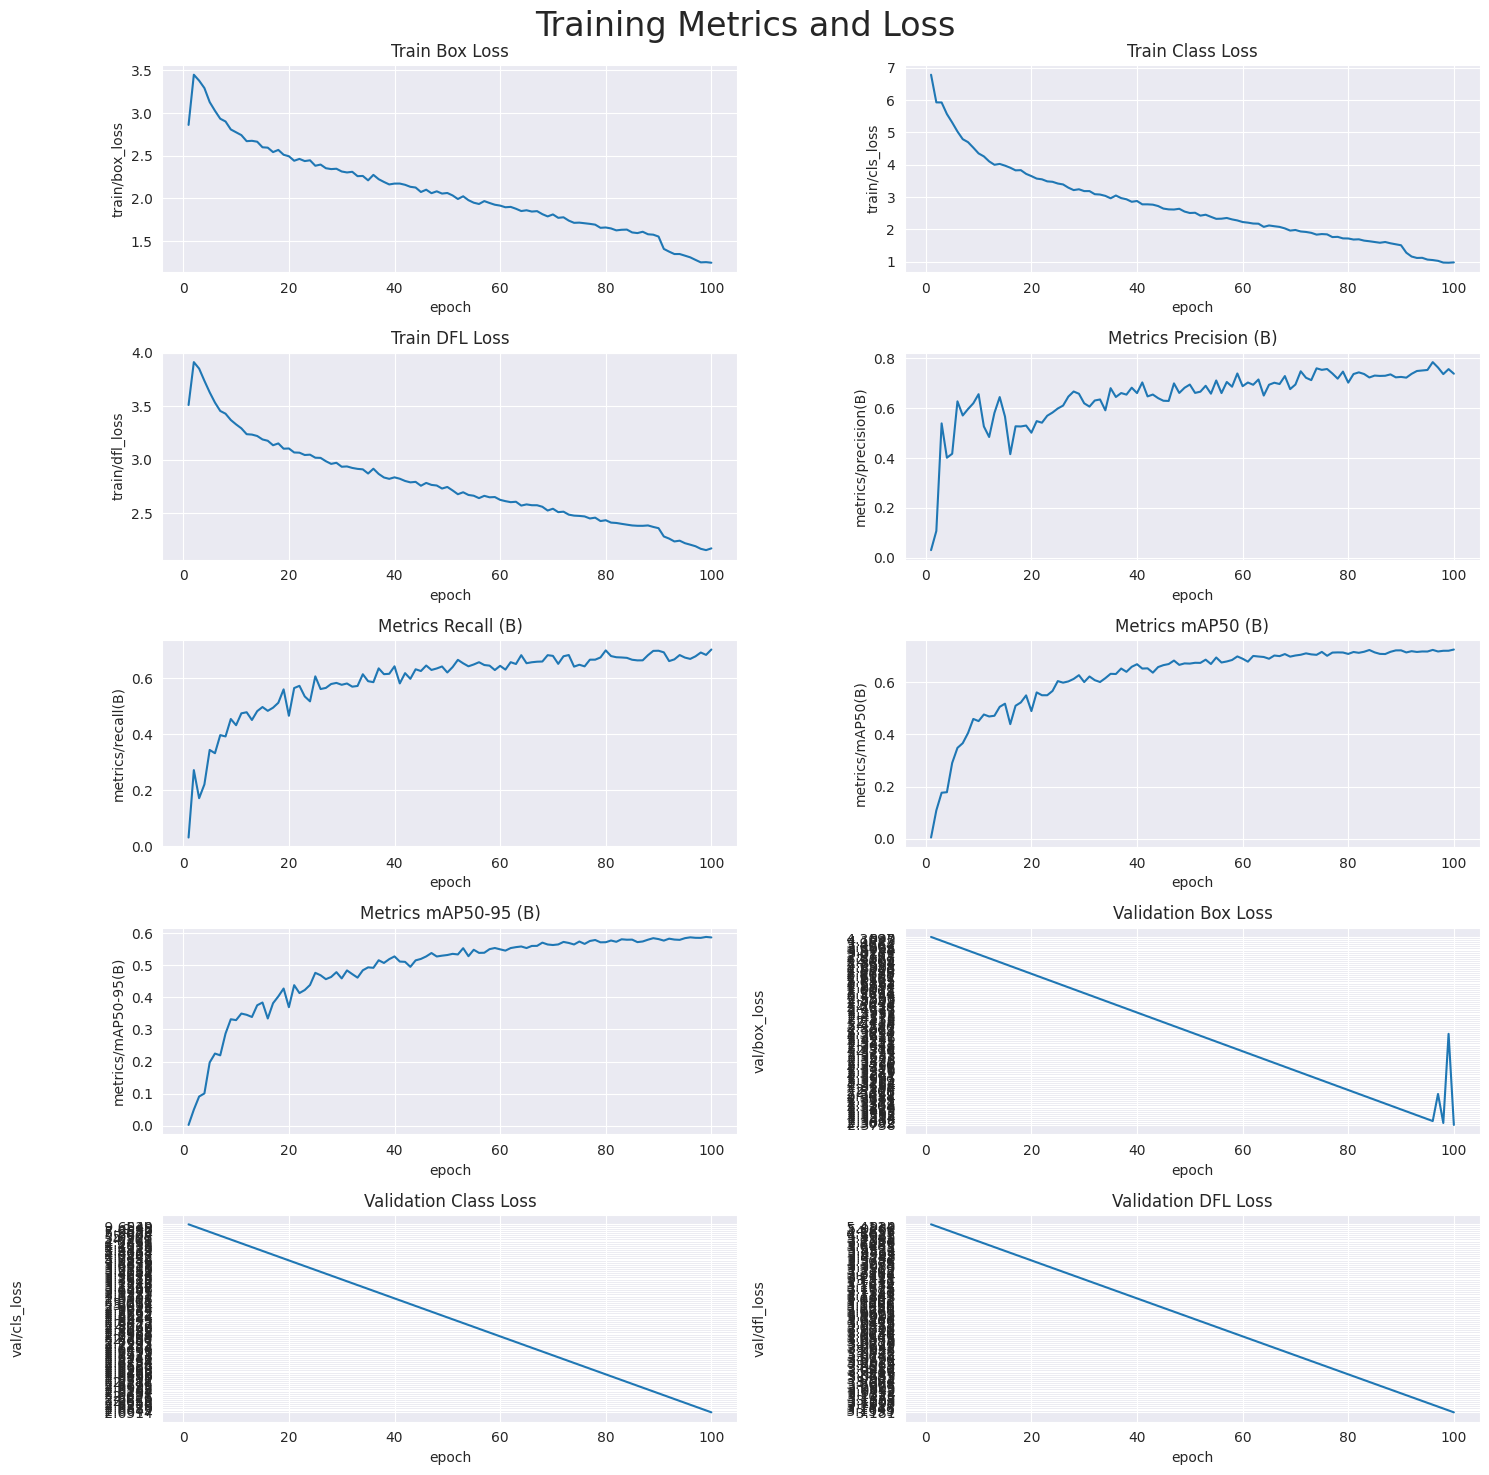

In [16]:
%matplotlib inline
# Считывание результатов обучения
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Отображение графиков
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)

plt.subplots_adjust(top=0.8)

plt.tight_layout()

plt.show()

In [17]:
%matplotlib inline
# Загрузка весов лучшей модели
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Оценка модели на тестовом датасете
metrics = model.val(conf = 0.5, split = 'test')

Ultralytics YOLOv8.2.78 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 461 layers, 25,725,620 parameters, 0 gradients, 126.4 GFLOPs


val: Scanning /kaggle/input/car-dam/test/labels... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 234.23it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-dam/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:20<00:00,  1.20it/s]


                   all        400        852      0.765      0.652       0.73      0.614
                 crack         64        101      0.487      0.188       0.33      0.203
                  dent        168        238      0.755      0.504      0.637      0.432
         glass shatter         74         74      0.971      0.919      0.955       0.93
           lamp broken         65         66      0.778      0.848      0.873      0.755
               scratch        202        347      0.707      0.493      0.615      0.395
             tire flat         26         26      0.893      0.962      0.971      0.966
Speed: 0.2ms preprocess, 42.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val


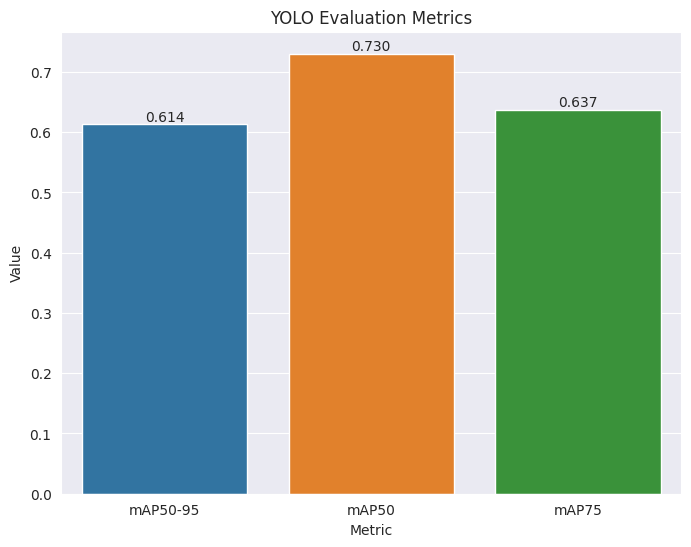

In [18]:
%matplotlib inline
# Отображение метрик
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

fig = plt.gcf()
fig.set_size_inches(8, 6)

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

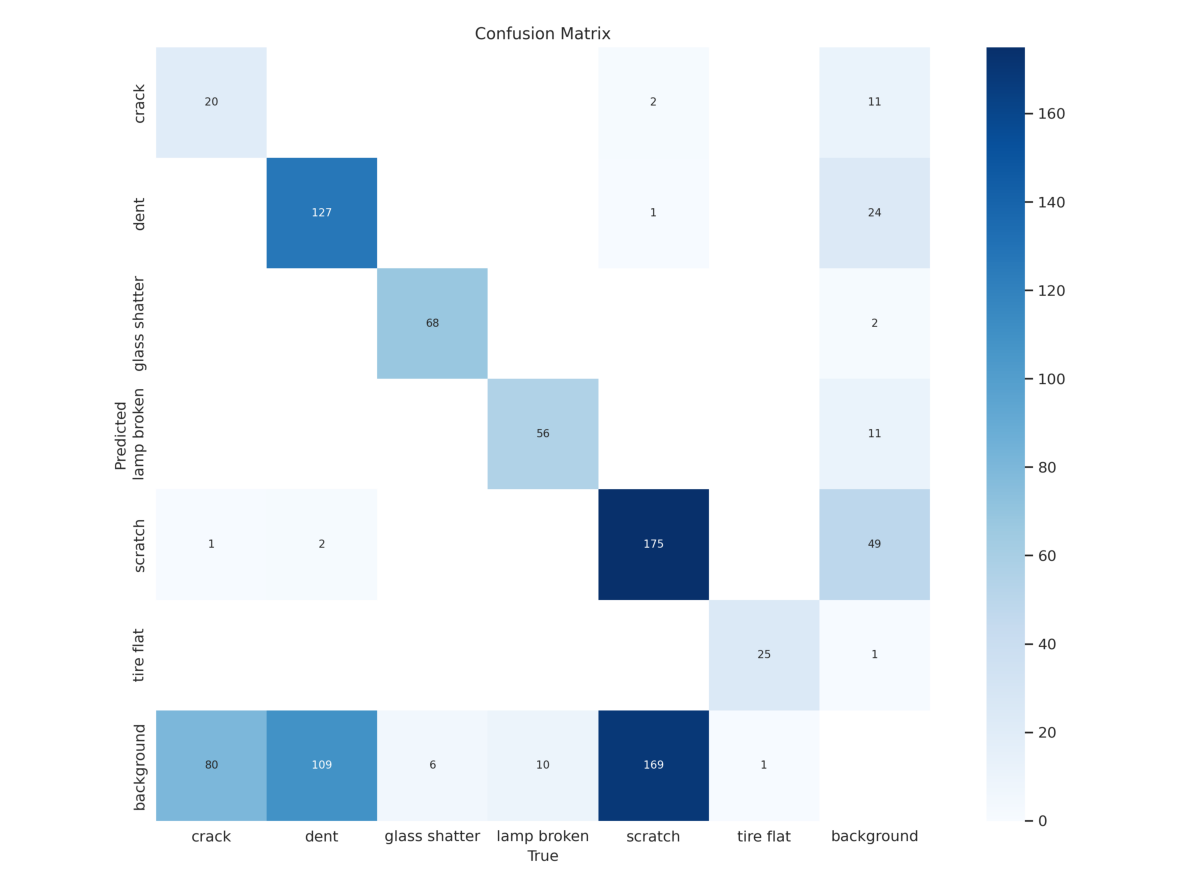

In [19]:
%matplotlib inline
# Отображение матрицы ошибок
img = mpimg.imread('/kaggle/working/runs/detect/val/confusion_matrix.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [21]:
# Функция для нахождения моделью повреждений
def car_detect(img_path):
    
    img = cv2.imread(img_path)

    detect_result = model(img)

    detect_img = detect_result[0].plot()
    
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 640x640 2 scratchs, 57.2ms
Speed: 3.3ms preprocess, 57.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 crack, 1 lamp broken, 52.9ms
Speed: 1.7ms preprocess, 52.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 35.4ms
Speed: 1.8ms preprocess, 35.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glass shatter, 34.7ms
Speed: 1.9ms preprocess, 34.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 scratch, 35.3ms
Speed: 2.3ms preprocess, 35.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tire flat, 34.8ms
Speed: 2.3ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glass shatter, 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tire flat, 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 0.

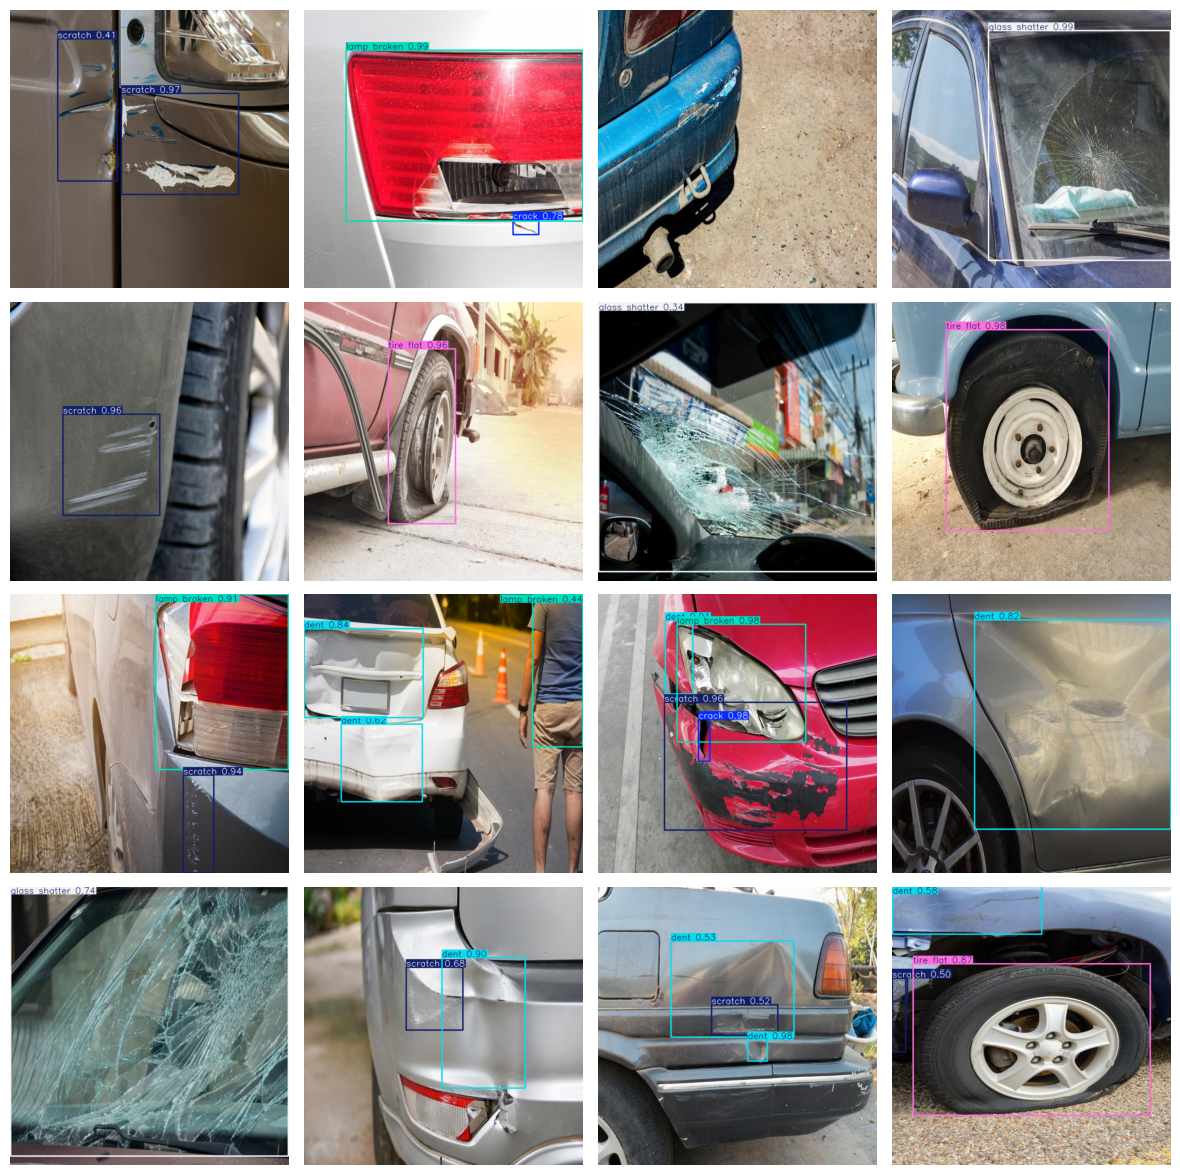

In [22]:
# Результат работы модели на 16 случайных изображениях из тестовых данных
custom_image_dir = '/kaggle/input/car-dam/test/images'

image_files = os.listdir(custom_image_dir)

selected_images = random.sample(image_files, 16)

# Создание графиков
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):
    
    row_idx = i // 4
    col_idx = i % 4
    # Загрузка изображение и применение написанной функции
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = car_detect(img_path)
    
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [5]:
 # Попробуем улучшить метрики и свою модель
model = YOLO('/kaggle/input/yolov10cardetection/pytorch/default/1/best.pt')

In [6]:
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_r

In [ ]:
# Обучение модели
model.train(data = '/kaggle/input/car-dam/data.yaml',
            epochs = 100,
            imgsz = 640,
            seed = 42,
            batch = 16,
            workers = 4,
            augment=True)

In [9]:
import torch
torch.cuda.empty_cache()


In [11]:
import torch
import gc

torch.cuda.empty_cache()
gc.collect()


114097

In [17]:
model.train(
        data = '/kaggle/input/car-dam/data.yaml',
        epochs = 10,
        imgsz = 640,
        seed = 42,
        batch = 8,
        workers = 4,
        augment=True,
        lr0=0.001,
        lrf=0.01,
        val=True,  # Включение валидации
    )

Ultralytics YOLOv8.2.81 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train3/weights/best.pt, data=/kaggle/input/car-dam/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

wandb: Currently logged in as: malyshok-ekaterina (malyshoke). Use `wandb login --relogin` to force relogin


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/car-dam/train/labels... 2800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2800/2800 [00:06<00:00, 454.26it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/car-dam/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/car-dam/valid/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 414.81it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-dam/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.73G      2.727      4.896      3.674         28        640: 100%|██████████| 350/350 [02:41<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.73it/s]

                   all        800       1755      0.613      0.494      0.532      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.37G      2.459      3.591      3.279         16        640: 100%|██████████| 350/350 [02:38<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.67it/s]

                   all        800       1755      0.626      0.515      0.554      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.36G      2.459      3.339      3.267         16        640: 100%|██████████| 350/350 [02:37<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.66it/s]

                   all        800       1755      0.603      0.574       0.59      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       8.3G      2.409      3.151      3.215         30        640: 100%|██████████| 350/350 [02:36<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.66it/s]

                   all        800       1755      0.608      0.592      0.602      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.35G      2.289      2.882      3.089         17        640: 100%|██████████| 350/350 [02:37<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.69it/s]

                   all        800       1755      0.597      0.573      0.606      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.36G      2.159      2.655      2.959         15        640: 100%|██████████| 350/350 [02:37<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.66it/s]

                   all        800       1755      0.645      0.602      0.635        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.37G      2.041      2.478       2.89         17        640: 100%|██████████| 350/350 [02:36<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.66it/s]

                   all        800       1755      0.674       0.61      0.646      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       8.3G      1.922      2.228      2.774         12        640: 100%|██████████| 350/350 [02:37<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.66it/s]

                   all        800       1755      0.704       0.62      0.673      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.36G      1.821       2.02      2.683         12        640: 100%|██████████| 350/350 [02:36<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.66it/s]

                   all        800       1755      0.732      0.633      0.694      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.36G      1.746      1.859       2.59         14        640: 100%|██████████| 350/350 [02:37<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.70it/s]

                   all        800       1755      0.708      0.656      0.699      0.555



10 epochs completed in 0.507 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 52.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 52.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 461 layers, 25,725,620 parameters, 0 gradients, 126.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/50 [00:00<?, ?it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 1/50 [00:00<00:18,  2.70it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|▍         | 2/50 [00:00<00:18,  2.60it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▌         | 3/50 [00:02<00:39,  1.19it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 4/50 [00:02<00:30,  1.52it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 5/50 [00:03<00:35,  1.26it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▏        | 6/50 [00:03<00:28,  1.57it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 7/50 [00:04<00:23,  1.84it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  16%|█▌        | 8/50 [00:04<00:20,  2.07it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  18%|█▊        | 9/50 [00:04<00:18,  2.27it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 10/50 [00:05<00:16,  2.44it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22%|██▏       | 11/50 [00:05<00:15,  2.55it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  24%|██▍       | 12/50 [00:05<00:14,  2.63it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  26%|██▌       | 13/50 [00:06<00:13,  2.69it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 14/50 [00:06<00:13,  2.72it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|███       | 15/50 [00:07<00:12,  2.77it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  32%|███▏      | 16/50 [00:07<00:12,  2.80it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  34%|███▍      | 17/50 [00:07<00:11,  2.83it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 18/50 [00:08<00:11,  2.83it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 19/50 [00:08<00:10,  2.83it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 20/50 [00:08<00:10,  2.85it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  42%|████▏     | 21/50 [00:09<00:10,  2.85it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 22/50 [00:09<00:09,  2.83it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  46%|████▌     | 23/50 [00:09<00:09,  2.83it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 24/50 [00:10<00:09,  2.84it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 25/50 [00:10<00:08,  2.84it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  52%|█████▏    | 26/50 [00:10<00:08,  2.82it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  54%|█████▍    | 27/50 [00:11<00:08,  2.80it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▌    | 28/50 [00:11<00:07,  2.81it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  58%|█████▊    | 29/50 [00:12<00:07,  2.79it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 30/50 [00:12<00:07,  2.77it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▏   | 31/50 [00:12<00:06,  2.77it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 32/50 [00:13<00:06,  2.78it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  66%|██████▌   | 33/50 [00:13<00:06,  2.78it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  68%|██████▊   | 34/50 [00:13<00:05,  2.78it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 35/50 [00:14<00:05,  2.79it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  72%|███████▏  | 36/50 [00:14<00:05,  2.80it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  74%|███████▍  | 37/50 [00:14<00:04,  2.80it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  76%|███████▌  | 38/50 [00:15<00:04,  2.80it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  78%|███████▊  | 39/50 [00:15<00:03,  2.81it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 40/50 [00:15<00:03,  2.82it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  82%|████████▏ | 41/50 [00:16<00:03,  2.83it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  84%|████████▍ | 42/50 [00:16<00:02,  2.82it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 43/50 [00:17<00:02,  2.82it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 44/50 [00:17<00:02,  2.81it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 45/50 [00:17<00:01,  2.81it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  92%|█████████▏| 46/50 [00:18<00:01,  2.82it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  94%|█████████▍| 47/50 [00:18<00:01,  2.82it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  96%|█████████▌| 48/50 [00:18<00:00,  2.82it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  98%|█████████▊| 49/50 [00:19<00:00,  2.82it/s]

WARNING ⚠️ End2End model does not support 'augment=True' prediction. Reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:19<00:00,  2.57it/s]


                   all        800       1755      0.708      0.657      0.699      0.555
                 crack        116        188      0.444      0.261      0.282      0.144
                  dent        341        483      0.626      0.523      0.567       0.33
         glass shatter        129        129      0.899      0.938      0.961      0.899
           lamp broken        132        136      0.794      0.816      0.861      0.747
               scratch        417        742      0.577      0.515      0.564      0.327
             tire flat         74         77      0.907      0.891      0.959      0.883
Speed: 0.2ms preprocess, 18.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train4


wandb: Network error resolved after 0:00:01.249637, resuming normal operation.


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4d1219b4f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

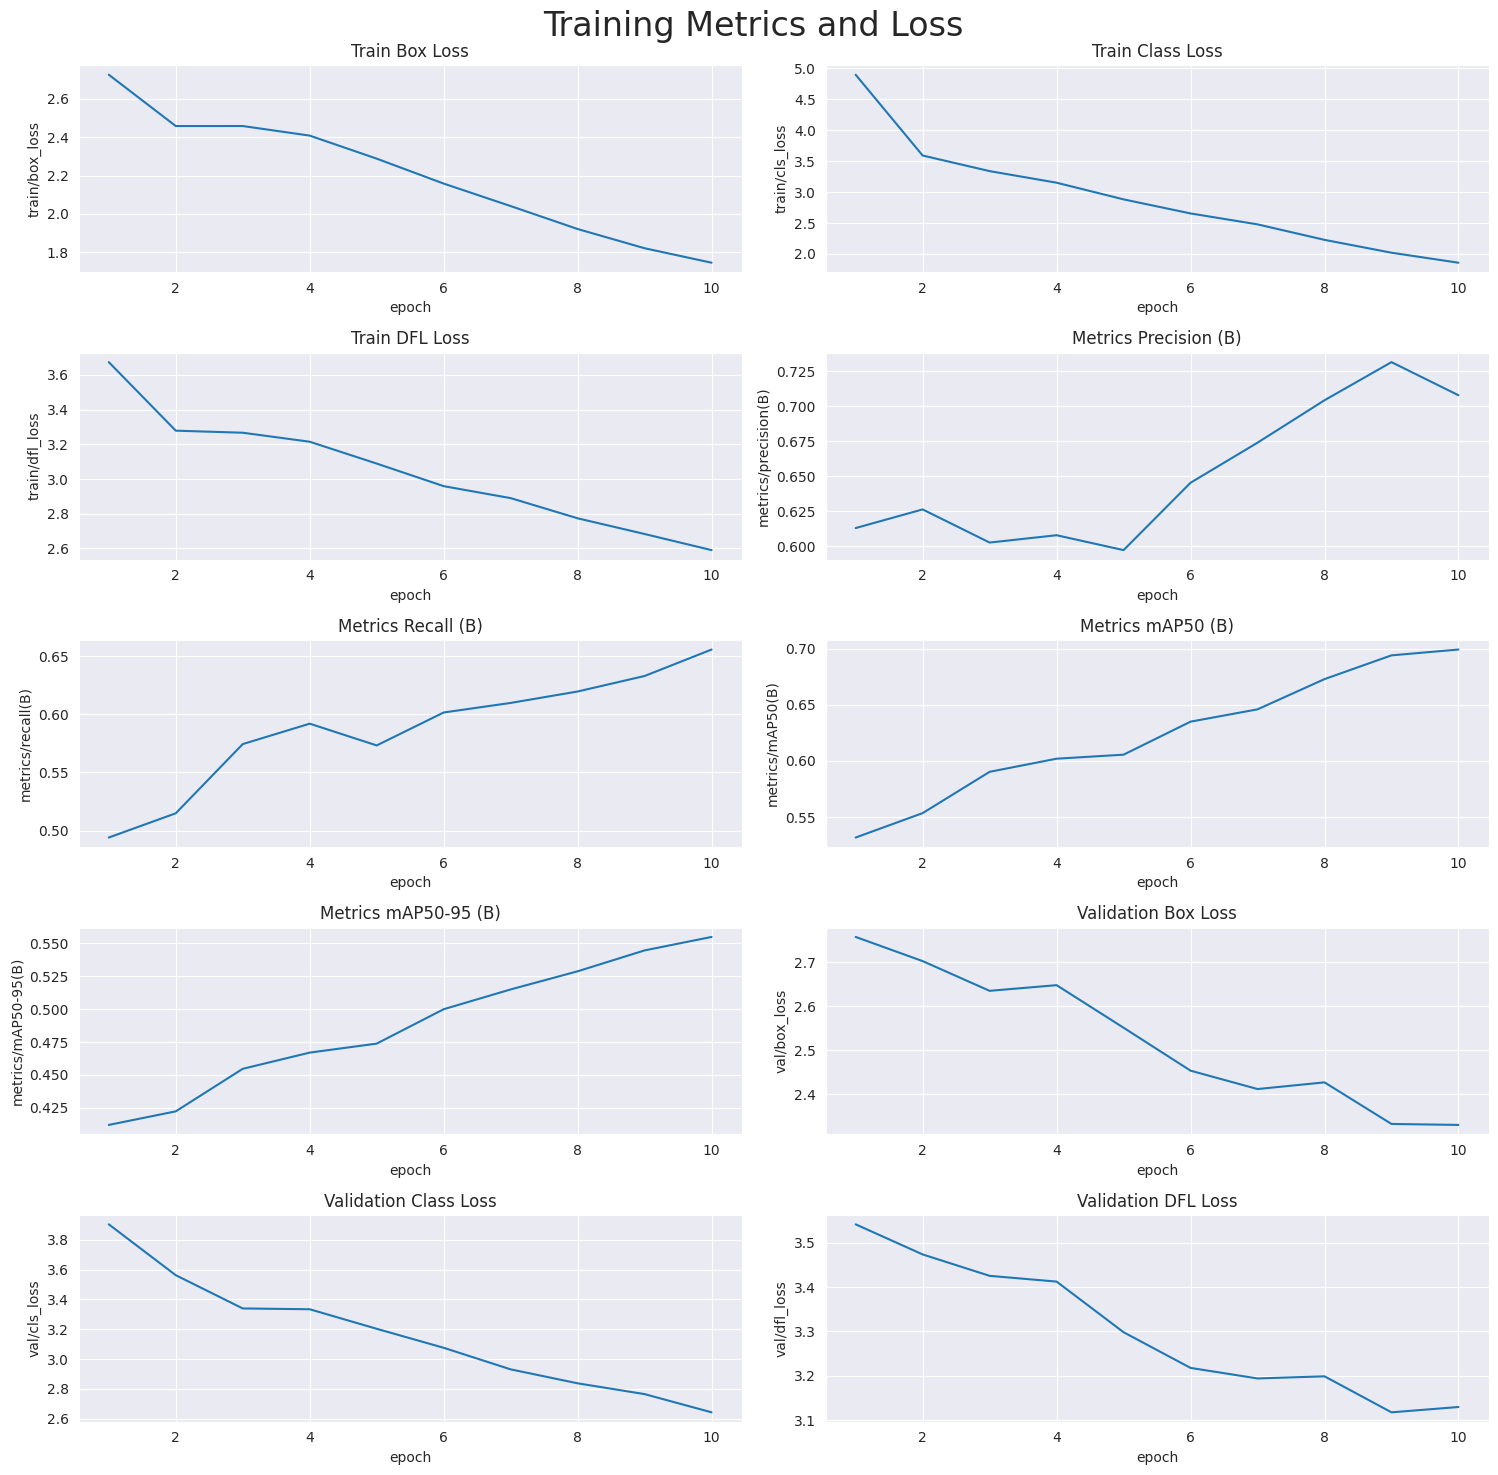

In [18]:
%matplotlib inline
# Считывание результатов обучения
df = pd.read_csv('/kaggle/working/runs/detect/train4/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Отображение графиков
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)

plt.subplots_adjust(top=0.8)

plt.tight_layout()

plt.show()

In [19]:
%matplotlib inline
# Загрузка весов лучшей модели
model = YOLO('/kaggle/working/runs/detect/train4/weights/best.pt')

# Оценка модели на тестовом датасете
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.2.81 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 461 layers, 25,725,620 parameters, 0 gradients, 126.4 GFLOPs


val: Scanning /kaggle/input/car-dam/test/labels... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 351.74it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/car-dam/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]


                   all        400        852        0.7      0.695      0.731      0.606
                 crack         64        101      0.429      0.297      0.362      0.207
                  dent        168        238      0.673      0.563       0.64      0.416
         glass shatter         74         74          1      0.932      0.966      0.919
           lamp broken         65         66       0.76      0.864      0.871      0.762
               scratch        202        347       0.56      0.553      0.583      0.377
             tire flat         26         26      0.781      0.962      0.963      0.958
Speed: 0.3ms preprocess, 36.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val2


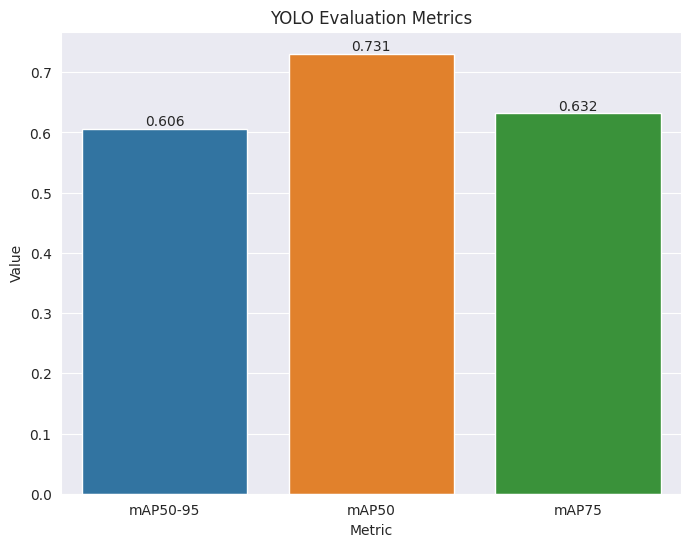

In [23]:
%matplotlib inline
# Отображение метрик
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

fig = plt.gcf()
fig.set_size_inches(8, 6)

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

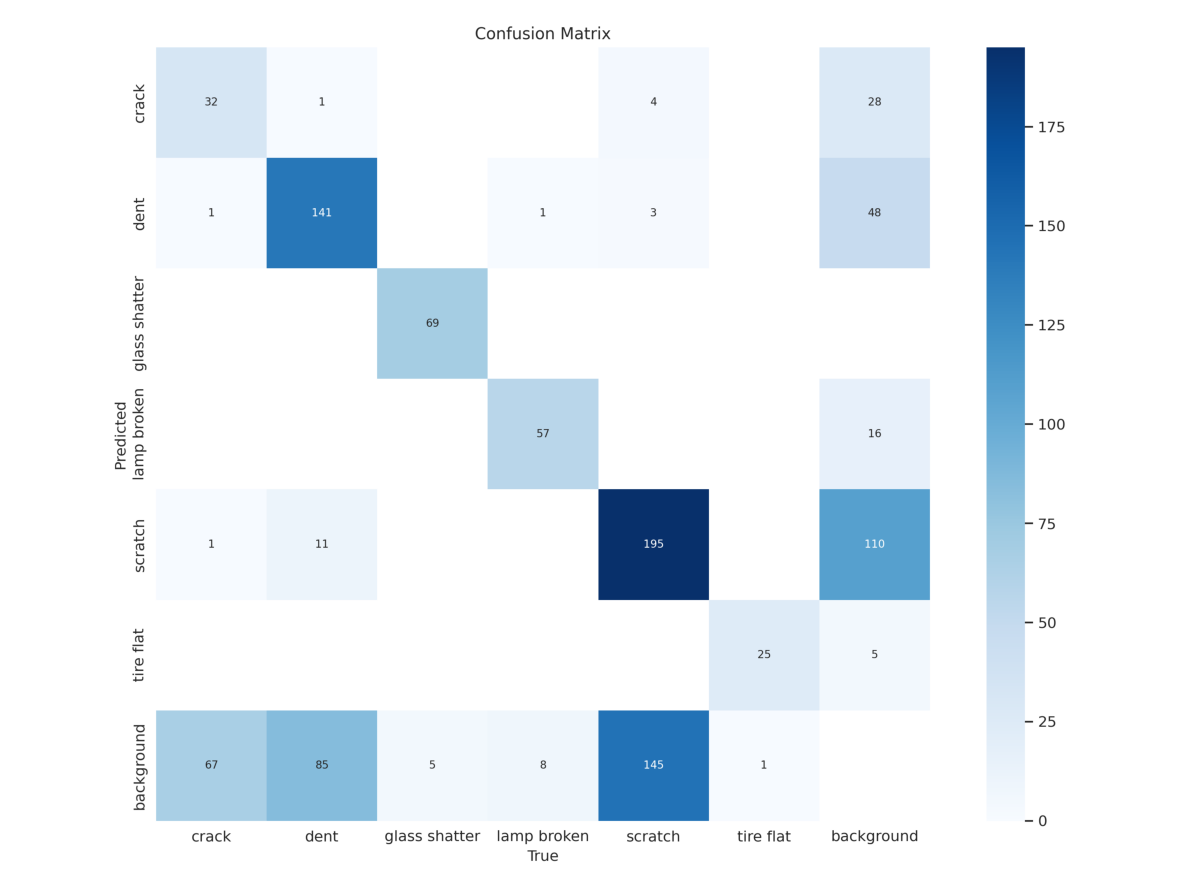

In [22]:
%matplotlib inline
# Отображение матрицы ошибок
img = mpimg.imread('/kaggle/working/runs/detect/val2/confusion_matrix.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [24]:
import shutil
import os
from IPython.display import FileLink

# Скачивание архива с результатами обучения
source_dir = '/kaggle/working/runs/detect'

zip_file = '/kaggle/working/myarch.zip'

shutil.make_archive(zip_file.replace('.zip', ''), 'zip', source_dir)


/kaggle/working/myarch.zip

In [26]:
# Создание ссылки для загрузки архива

FileLink(r'myarch.zip')


/kaggle/working/myarch.zip